<a href="https://colab.research.google.com/github/NoelleI/AI-Experiments-Pigmentation/blob/master/ica_fooling_around.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

file = 'IMG_3447 (1)_Trim.mp4'

cap = cv2.VideoCapture(file)

# Get frame count
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))




i = 0
ret = True
ret, frame = cap.read()
frames = frame
for i in range(n_frames -1):
  #print(i)
  ret, frame = cap.read()
  frames = np.concatenate((frames,frame), axis = 0)



In [0]:
frames = frames.reshape([-1,1920,1080,3])

In [4]:
frames.shape

(424, 1920, 1080, 3)

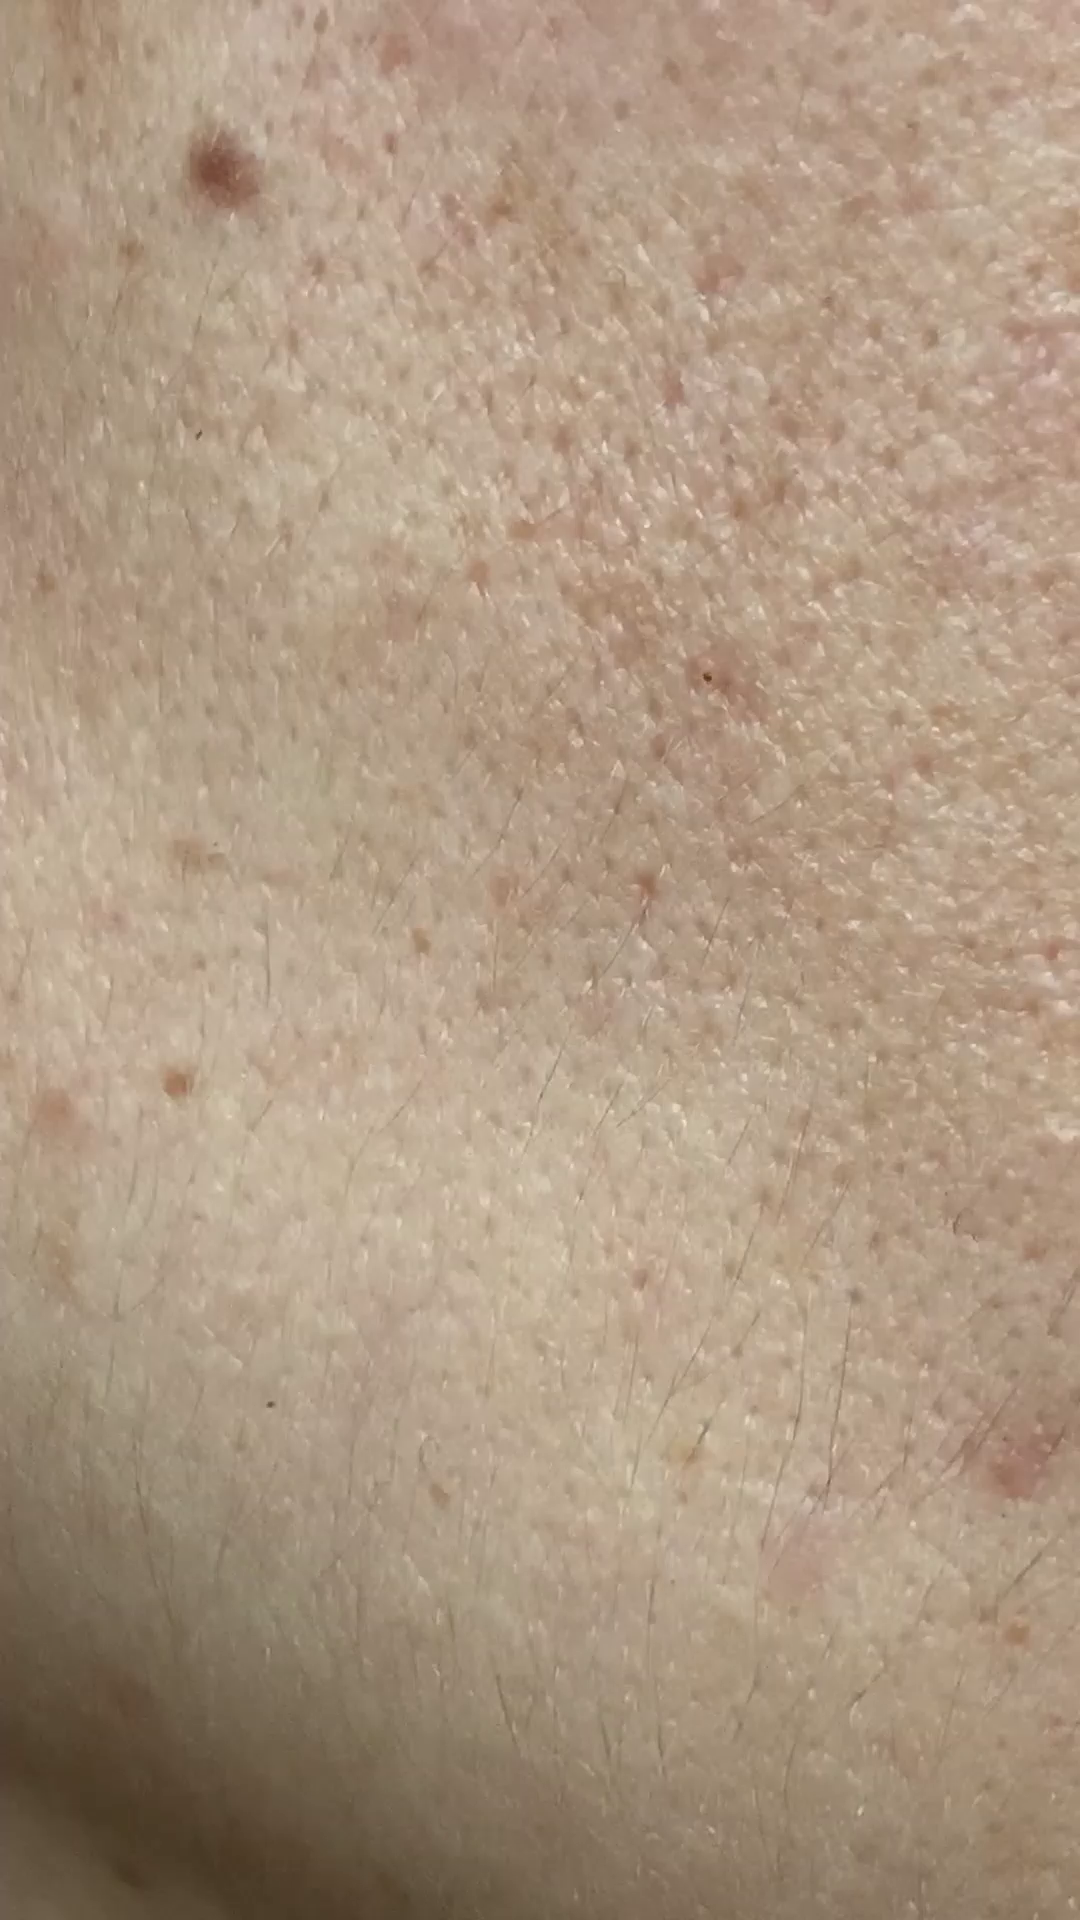

In [5]:
cv2_imshow(frames[0])

In [0]:
#plt.scatter(frames[100:110,:,:,2],frames[100:110,:,:,0])

In [0]:
#plt.scatter(frames[100:110,:,:,2],frames[100:110,:,:,1])

In [0]:
#plt.scatter(frames[100:110,:,:,0],frames[100:110,:,:,1])

In [38]:
frames_ica = np.mean(frames, axis = (1,2))
frames_ica.shape

(424, 3)

In [0]:
from sklearn.decomposition import FastICA

In [0]:
transformer = FastICA(n_components=2, random_state=0)

In [0]:
frames_transformed = transformer.fit_transform(frames_ica)

In [61]:
frames_transformed.shape

(424, 2)

In [62]:
frames_transformed[0]

array([0.02831719, 0.00861661])

In [63]:

frames_ica[0]

array([130.05429302, 151.7207745 , 173.05290027])

In [64]:
np.max(frames_transformed)

0.20746682773405828

In [0]:
reconstruction = transformer.inverse_transform(frames_transformed)

In [66]:
reconstruction[0]

array([130.48031144, 151.25079914, 173.11266819])

In [0]:
frames_transformed /= frames_transformed.std(axis=0)

In [0]:
#frames_transformed_reshaped = frames_transformed.reshape([-1,1920,1080,2])

In [0]:
#frames_transformed_reshaped.shape

In [0]:
#frames_ica.reshape([-1,1920,1080,3]).shape

In [0]:
#reconstruction.reshape([-1,1920,1080,3]).shape

In [0]:
#}recons_pic = reconstruction.reshape([-1,1920,1080,3]).astype(int)

In [0]:

#frames_ica_pic = frames_ica.reshape([-1,1920,1080,3])

In [81]:
frames_transformed[0]

array([0.58308655, 0.17742686])

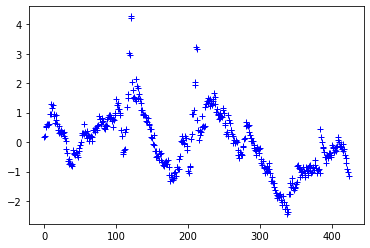

In [87]:
blood = frames_transformed[:,1]
plt.plot(blood, 'b+')

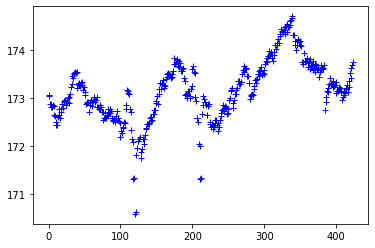

In [85]:
blood2 = frames_ica[:,2]
plt.plot(blood2, 'b+')

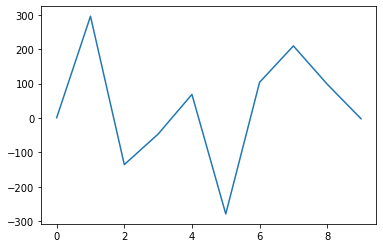

In [89]:
plt.plot(np.fft.hfft(blood)[:10])

### Examples ###

In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA, FastICA

In [0]:
rng = np.random.RandomState(42)
S = rng.standard_t(1.5, size=(20000, 2))
S[:, 0] *= 2.


In [32]:
A = np.array([[1, 1], [0, 2]])  # Mixing matrix

X = np.dot(S, A.T)  # Generate observations

pca = PCA()
S_pca_ = pca.fit(X).transform(X)

ica = FastICA(random_state=rng)
S_ica_ = ica.fit(X).transform(X)  # Estimate the sources

print(S_ica_.std(axis=0))
print(S_ica_[0])
S_ica_ /= S_ica_.std(axis=0)
print(S_ica_[0])

[0.00707107 0.00707107]
[0.00032331 0.00036404]
[0.04572283 0.05148335]


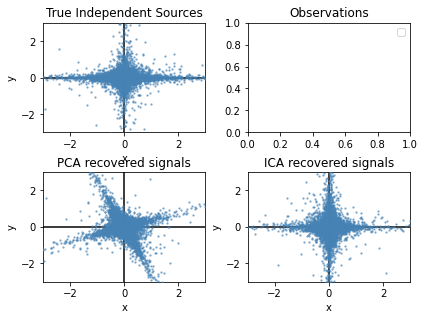

In [33]:
def plot_samples(S, axis_list=None):
    plt.scatter(S[:, 0], S[:, 1], s=2, marker='o', zorder=10,
                color='steelblue', alpha=0.5)
    if axis_list is not None:
        colors = ['orange', 'red']
        for color, axis in zip(colors, axis_list):
            axis /= axis.std()
            x_axis, y_axis = axis
            # Trick to get legend to work
            plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=2, color=color)
            plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6,
                       color=color)

    plt.hlines(0, -3, 3)
    plt.vlines(0, -3, 3)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.xlabel('x')
    plt.ylabel('y')

plt.figure()
plt.subplot(2, 2, 1)
plot_samples(S / S.std())
plt.title('True Independent Sources')

axis_list = [pca.components_.T, ica.mixing_]
plt.subplot(2, 2, 2)
#plot_samples(X / np.std(X), axis_list=axis_list)
legend = plt.legend(['PCA', 'ICA'], loc='upper right')
legend.set_zorder(100)

plt.title('Observations')

plt.subplot(2, 2, 3)
plot_samples(S_pca_ / np.std(S_pca_, axis=0))
plt.title('PCA recovered signals')

plt.subplot(2, 2, 4)
plot_samples(S_ica_ / np.std(S_ica_))
plt.title('ICA recovered signals')

plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.36)
plt.show()